# Section 1: Introduction to Deutsch's Algorithm

Quantum computing represents a revolutionary approach to computation, harnessing quantum mechanics to achieve processing power beyond the capabilities of classical computers. A quantum bit, or qubit, is the fundamental unit of quantum information, analogous to a bit in classical computing. Unlike bits, which are binary, qubits can exist in multiple states simultaneously due to the principle of superposition.

In 1985, David Deutsch proposed what is now known as Deutsch's Algorithm, which addressed a simple problem through a quantum lens: determining if a hidden binary function is constant (the same output for all inputs) or balanced (outputs half 0s and half 1s). Classical logic dictates that two queries to the function are needed to determine this, but Deutsch's Algorithm could ascertain the answer with a single quantum operation.

This algorithm not only marked the inception of quantum algorithms but also laid the groundwork for quantum computational theory, influencing the development of more sophisticated algorithms. It uses quantum gates to manipulate qubits, exploiting superposition and interference, and culminates in a measurement that, counterintuitively, provides complete information about the global nature of the function.

In this section, we will explore the origins and implications of Deutsch's Algorithm, understand the fundamental quantum computing concepts it employs, and prepare to delve into its implementation with Qiskit.

## Expanded References for Introduction Section:

1. Deutsch, D. (1985). Quantum theory, the Church-Turing principle and the universal quantum computer. *Proceedings of the Royal Society of London. Series A. Mathematical and Physical Sciences*, 400(1818), 97–117.
2. Nielsen, M. A., & Chuang, I. L. (2010). *Quantum Computation and Quantum Information*. Cambridge University Press.
3. Mermin, N. D. (2007). *Quantum Computer Science: An Introduction*. Cambridge University Press.
4. Jozsa, R., & Linden, N. (2003). On the role of entanglement in quantum-computational speed-up. *Proceedings of the Royal Society of London. Series A: Mathematical, Physical and Engineering Sciences*, 459(2036), 2011-2032.
5. Shor, P. W. (1997). Polynomial-Time Algorithms for Prime Factorization and Discrete Logarithms on a Quantum Computer. *SIAM Journal on Computing*, 26(5), 1484–1509.


# Section 2: Detailed Explanation of Deutsch's Algorithm

Deutsch's Algorithm solves a specific problem in quantum computation known as the Deutsch problem. It determines if a given quantum function, encoded as an oracle, is constant or balanced with only one query. This contrasts with the classical approach, which requires checking both possible inputs.

The algorithm uses the following steps:

1. Initialize the qubits: Start with two qubits, the first in state `|0⟩` and the second in state `|1⟩`.

2. Apply Hadamard gates: Apply a Hadamard gate to both qubits to create a superposition of states.

3. Apply the oracle: Introduce the quantum oracle, which performs a specific unitary transformation based on the function being evaluated.

4. Apply Hadamard gate again: Apply another Hadamard gate to the first qubit, which leads to interference patterns that are key to the algorithm.

5. Measure the first qubit: The measurement will collapse the first qubit into one of the basis states, `|0⟩` or `|1⟩`, indicating whether the function is constant or balanced.

The quantum oracle is the heart of the algorithm. It is a black box that performs a specific transformation on the qubits. For a constant function, it leaves them unchanged or flips them both. For a balanced function, it flips the second qubit conditional on the first qubit being in state `|1⟩`.

Here is a table illustrating the function types and their outputs:

| Function Type    | $x=0$ | $x=1$ | 
| ---------------- | ----- | ----- |
| Constant (0)     | 0     | 0     | 
| Constant (1)     | 1     | 1     | 
| Balanced (0 ↦ 1) | 0     | 1     | 
| Balanced (1 ↦ 0) | 1     | 0     |






c:\Users\LENOVO\anaconda3\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


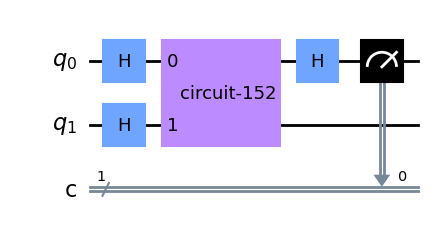

In [1]:
# Importing libraries for generating the circuits
import numpy as np
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

# Function to create a quantum circuit for Deutsch's Algorithm
def deutsch_circuit(oracle):
    qc = QuantumCircuit(2, 1)  # 2 qubits and 1 classical bit for measurement

    # Apply Hadamard gates to both qubits
    qc.h([0, 1])

    # Apply the oracle
    qc.append(oracle, [0, 1])

    # Apply another Hadamard gate to the first qubit
    qc.h(0)

    # Measure the first qubit
    qc.measure(0, 0)

    return qc

# Define an example oracle
example_oracle = QuantumCircuit(2)
# Here you can add operations to example_oracle to represent a specific function
# For example, let's add a CNOT gate for demonstration
example_oracle.cx(0, 1)

# Create the circuit
qc = deutsch_circuit(example_oracle)

# Draw the circuit
qc.draw(output='mpl')


In the simulation section, we will see how these theoretical steps translate into a quantum circuit and how the measurement confirms the nature of the oracle's function.

## References for Detailed Explanation Section:

1. Deutsch, D. (1985). Quantum theory, the Church-Turing principle and the universal quantum computer. *Proceedings of the Royal Society of London. Series A. Mathematical and Physical Sciences*, 400(1818), 97–117.
2. Cleve, R., Ekert, A., Macchiavello, C., & Mosca, M. (1998). Quantum algorithms revisited. *Proceedings of the Royal Society of London. Series A: Mathematical, Physical and Engineering Sciences*, 454(1969), 339-354.